In [1]:
# importing the dependencies
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [5]:
for dirname, _, filenames in os.walk('..\Datasets\Digit Recognizer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Datasets\Digit Recognizer\sample_submission.csv
..\Datasets\Digit Recognizer\test.csv
..\Datasets\Digit Recognizer\test.csv.zip
..\Datasets\Digit Recognizer\train.csv
..\Datasets\Digit Recognizer\train.csv.zip


In [12]:
# loading the dataset
train_df = pd.read_csv("../Datasets/Digit Recognizer/train.csv")
test_df = pd.read_csv("../Datasets/Digit Recognizer/test.csv")
train = pd.read_csv("../Datasets/Digit Recognizer/train.csv") 
test = pd.read_csv("../Datasets/Digit Recognizer/test.csv")

In [10]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_train = train_df['label']
del train_df['label']

In [22]:
y_train.tail()

41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, dtype: int64

In [18]:
train_df.shape

(42000, 784)

In [19]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train_bin = label_binarizer.fit_transform(y_train)

In [21]:
y_train_bin

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [23]:
X_train = train_df.values
X_test = test_df.values

In [25]:
X_train.shape

(42000, 784)

In [27]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [28]:
X_train_all = X_train.reshape(X_train.shape[0],28, 28,1).astype('float32')
X_test_all = X_test.reshape(X_test.shape[0],28, 28,1).astype('float32')

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_bin, test_size=0.20, random_state=42, shuffle=True)

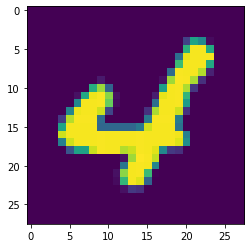

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [30]:
index = 500
plt.imshow(X_train[index])
plt.show()
y_train[index]